<a href="https://colab.research.google.com/github/Manikanta-18/Manikanta-18/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

**Importing Data**

In [ ]:
df=pd.read_excel("customer_churn_large_dataset.xlsx",sheet_name='Sheet1')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


**Understanding the data**

In [ ]:
df.shape

(100000, 9)

In [ ]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


**Data Preprocessing**

In [ ]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [ ]:
# Above data is evident that there are no missing values

In [ ]:
# Handling outliers

In [ ]:
%matplotlib inline

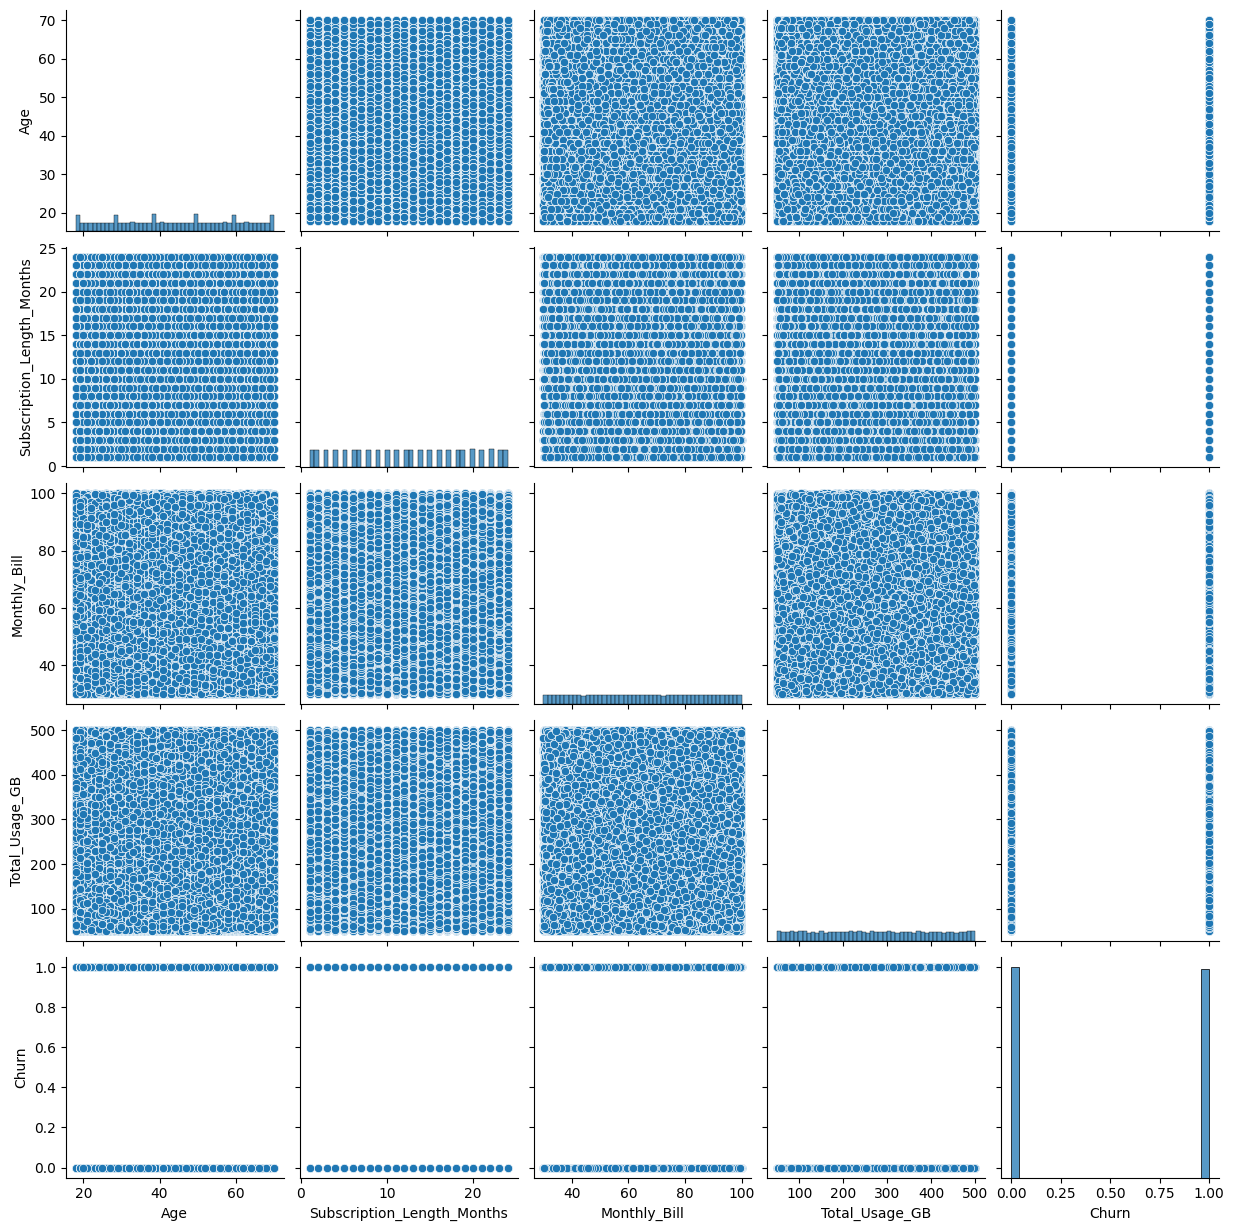

In [ ]:
import seaborn as sns

To_Plot = ['Age',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn']

sns.pairplot(df[To_Plot])

"""High Data Density: This means that there is a high density of data points within your dataset.

Overlapping Data: The scatter plots overlapping points suggest that there may be many data points with identical or very similar x and y values. This often occurs when dealing with discrete or categorical data, as well as when there are limited unique values in the dataset.

Correlations and Relationships: When scatter plots densely cover the entire space, it can be challenging to visually identify clear patterns or relationships between variables. In such cases, it's essential to use additional tools like correlation coefficients, regression lines, or domain knowledge to understand the data relationships better.

Potential Outliers: The dense scatter plots may obscure the visibility of potential outliers or extreme values. """

<ipython-input-16-30a5ac9f6042>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

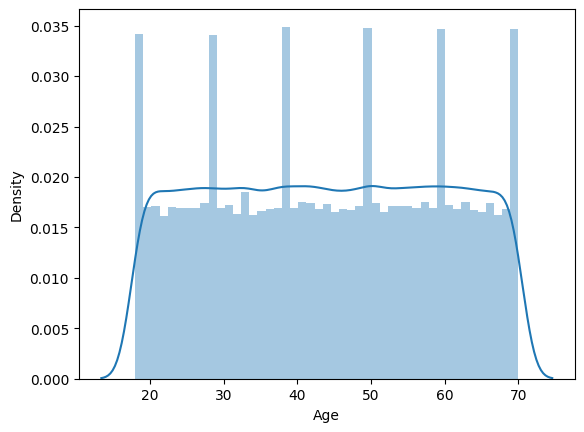

In [ ]:
#finding outliers of AGE column
import seaborn as sns
sns.distplot(df['Age'])

In [ ]:
df['Age'].skew()

-0.002688580535339188

In [ ]:
df['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [ ]:
c=df[(df['Gender'] == 'Male') & (df['Churn'] == 1)]
c.shape[0]

24835

In [ ]:
d=df[(df['Gender'] == 'Female') & (df['Churn'] == 1)]
d.shape[0]

24944

<BarContainer object of 2 artists>

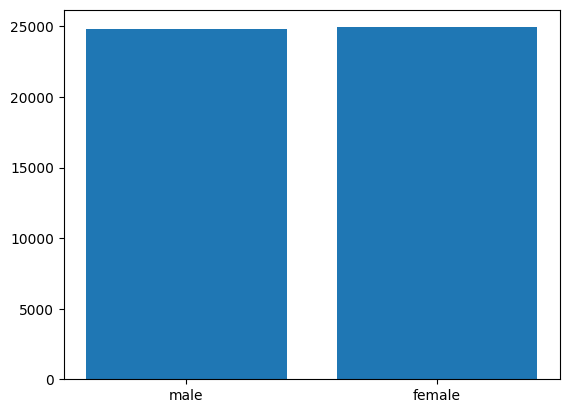

In [ ]:
from matplotlib import pyplot as plt
x=['male','female']
y=[c.shape[0],d.shape[0]]
plt.bar(x,y)

"""Here the number of male and female are almost same and male and female churn almost equally.So this means no difference
between male and female. So gender won't decide if they Churn or not"""

In [ ]:
#Outlier detection using 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB'

<ipython-input-23-b39a9967dbfb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Subscription_Length_Months'])


<Axes: xlabel='Subscription_Length_Months', ylabel='Density'>

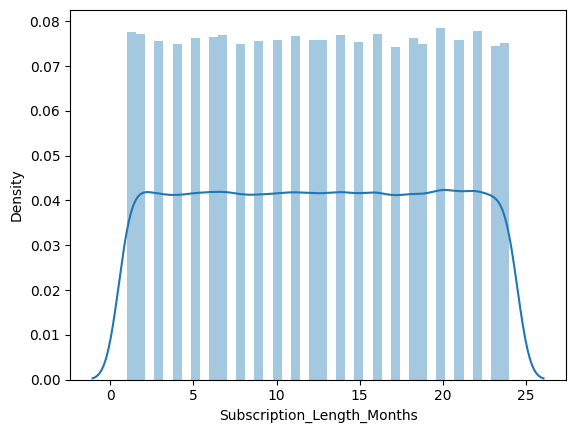

In [ ]:
sns.distplot(df['Subscription_Length_Months'])

In [ ]:
df['Subscription_Length_Months'].skew()

-0.0016554824859520909

In [ ]:
"""The above graph has no ouliers"""

'The above graph has no ouliers'

<ipython-input-26-9b4d76a18a93>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Monthly_Bill'])


<Axes: xlabel='Monthly_Bill', ylabel='Density'>

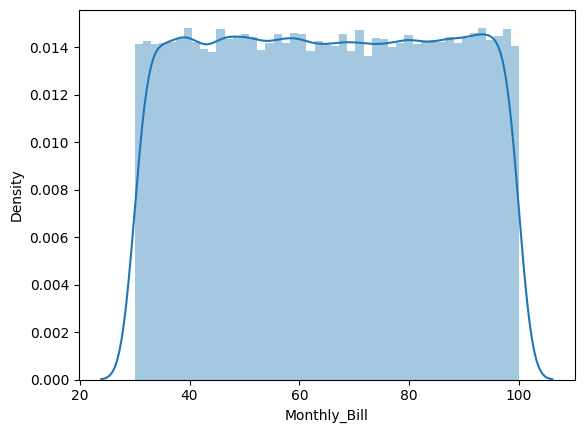

In [ ]:
sns.distplot(df['Monthly_Bill'])

<ipython-input-27-dc31b2530488>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Usage_GB'])


<Axes: xlabel='Total_Usage_GB', ylabel='Density'>

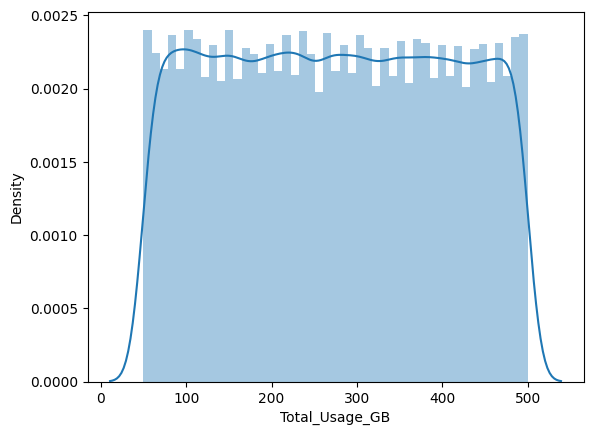

In [ ]:
sns.distplot(df['Total_Usage_GB'])

"""With the graphs it is evident that the data has no outliers"""

In [ ]:

a=df['Location'].unique()

In [ ]:
# Let us see the relation between location and churn
lis=[]
for i in a:
    c=df[(df['Location'] == i) & (df['Churn'] == 1)]
    lis.append(c.shape[0])
lis

[9880, 9979, 10076, 9945, 9899]

<BarContainer object of 5 artists>

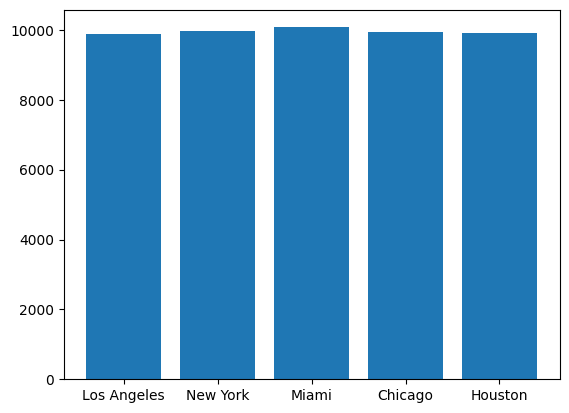

In [ ]:
plt.bar(a,lis)

In [ ]:
"""Here the number of each location is almost same and each locations churn is also almost same. location won't create any difference.
So Locations won't have any change in Churn"""

"Here the number of each location is almost same and each locations churn is also almost same. location won't create any difference.\nSo Locations won't have any change in Churn"

In [ ]:
columns_to_drop = ['Location', 'Gender','CustomerID','Name']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:

df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,17,73.36,236,0
1,62,1,48.76,172,0
2,24,5,85.47,460,0
3,36,3,97.94,297,1
4,46,19,58.14,266,0


**Splitting train and test data**

In [ ]:
Y=df['Churn']

In [ ]:
df.drop(columns='Churn', inplace=True)

In [ ]:
df.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63,17,73.36,236
1,62,1,48.76,172
2,24,5,85.47,460
3,36,3,97.94,297
4,46,19,58.14,266


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=72)

**Feature Engineering**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data (calculate mean and standard deviation)
scaler.fit(X_train)

# Transform (scale) your data
scaled_data = scaler.transform(X_train)



In [ ]:
scaled_data

array([[ 1.69751271,  0.79493968, -1.70304303,  0.19563354],
       [ 0.8469948 ,  0.36170152,  0.64996156, -0.50956731],
       [-1.3120122 ,  0.50611424, -1.63534844,  0.91616484],
       ...,
       [-0.33064538, -0.79360025, -1.58593633,  0.63255146],
       [-0.65776765,  0.36170152,  0.16424054,  0.06532469],
       [ 0.58529698,  0.2172888 ,  0.21464089, -0.09564507]])

In [ ]:
#feature extraction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

In [ ]:
num_components = np.argmax(cumulative_variance >= 0.95) + 1

Text(0, 0.5, 'Explained Variance Ratio')

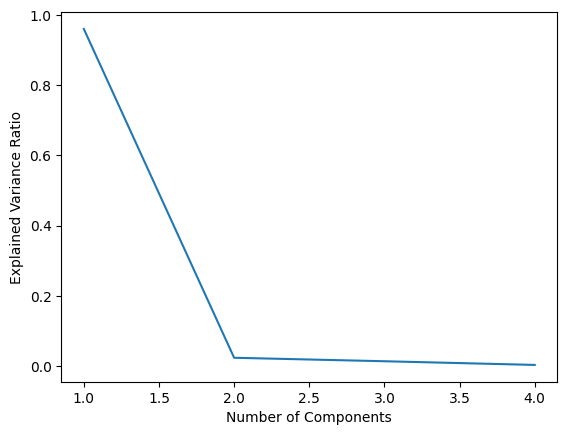

In [ ]:
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')

**selected the number of principal components equal to the knee point on the explained variance plot because it represents a data-driven balance between dimensionality reduction and information retention. At the knee point, the rate of increase in explained variance significantly slows down, indicating that additional components contribute relatively little to capturing the overall variability in the data. This choice optimizes our ability to reduce dimensionality while preserving the most essential patterns and minimizing the risk of overfitting in our analysis or modeling**



**Feature Extraction with n=2**

In [ ]:
pca = PCA(n_components=2)

# Fit PCA to the standardized data
pca.fit(scaled_data)

# Transform the data into the first two principal components
X_pca = pca.transform(scaled_data)

In [ ]:
# Convert the NumPy array to a Pandas DataFrame
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

In [ ]:
df_pca.head()

,PC1,PC2
0,-1.521048,1.422672
1,-0.017791,0.787970
2,-0.966842,-0.785010
3,-0.241024,1.965658
4,-0.472015,-0.484149


**Applying the same operations on train data(We have to apply these operations differently for train and test to avoid data leakage)**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data (calculate mean and standard deviation)
scaler.fit(X_test)

# Transform (scale) your data
scaled_data_test = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components=2)

# Fit PCA to the standardized data
pca.fit(scaled_data_test)

# Transform the data into the first two principal components
X_pca_test = pca.transform(scaled_data_test)

In [ ]:
# Convert the NumPy array to a Pandas DataFrame
df_pca_test = pd.DataFrame(data=X_pca_test, columns=['PC1', 'PC2'])

In [ ]:
df_pca_test.head()

,PC1,PC2
0,-0.903663,1.088819
1,1.778245,-0.133129
2,-1.242510,-0.865974
3,-0.330374,0.701340
4,0.401828,-0.423940


**Model selection**

**Applying ANN**

In [ ]:
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Create a sequential model
model = Sequential()

# Add an input layer with 4 neurons (matching the number of features) and ReLU activation
model.add(Dense(2, input_dim=2, activation='relu'))

# Add one hidden layer with a reasonable number of neurons (e.g., 8) and ReLU activation
model.add(Dense(4, activation='relu'))

# Add the output layer (for binary classification with sigmoid activation)
model.add(Dense(1, activation='sigmoid'))

 # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_pca, y_train, epochs=50, batch_size=200, verbose=1)

Epoch 1/50
400/400 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5032
Epoch 2/50
400/400 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5038
Epoch 3/50
400/400 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5036
Epoch 4/50
400/400 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5042
Epoch 5/50
400/400 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5033
Epoch 6/50
400/400 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5038
Epoch 7/50
400/400 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5041
Epoch 8/50
400/400 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5042
Epoch 9/50
400/400 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5043
Epoch 10/50
400/400 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5043

In [ ]:
# Evaluate the model
y_pred = (model.predict(X_pca_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)

625/625 [==============================] - 2s 3ms/step


In [ ]:
print(accuracy)

0.50285


In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.507514450867052
Recall: 0.08807302638178353


**Applying Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Initialize and fit the logistic regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_pca, y_train)

# Predict on the test set
y_pred = logistic_reg.predict(X_pca_test)

# Evaluate the model
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

# Optionally, you can print a classification report
report = classification_report(y_test, y_pred)

Accuracy: 0.5011


In [ ]:
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.49775112443778113
Recall: 0.09990972013241048


**Applying Random forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit (train) the model on the training data
rf_classifier.fit(X_pca, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_pca_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Optionally, print a classification report
report = classification_report(y_test, y_pred)

Accuracy: 0.5026


In [ ]:
# Assuming you have your true labels (ground truth) in y_true and predicted labels in y_pred

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.5010671816241488
Recall: 0.4945330524626342


As random forest classifier has more recall, Lets choose this model and optimize it.

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(rf_classifier, X_pca, y_train, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print(f"Mean CV Accuracy: {cross_val_scores.mean()}")

Cross-Validation Scores: [0.49875   0.4961875 0.5019375 0.5018125 0.49825  ]
Mean CV Accuracy: 0.4993875


The accuracy we got for previous result is better

In [ ]:
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.5010671816241488
Recall: 0.4945330524626342
